# Active Learning

In healthcare applications like breast cancer metastasis detection in whole-slide images, where there is a significant domain shift, traditional pre-trained models may not be sufficient. Active learning becomes crucial in such scenarios, as it helps efficiently address the challenge of limited annotated samples. Annotating large datasets is both expensive and time-consuming, often requiring hours of work from specialized expert pathologists with extensive training. Active learning strategies can minimize the amount of labeled data needed, making the process more feasible and cost-effective.

![CancerMetastas](../ActiveLearning/ActiveLearningImages/CancerMetastasPathologist.PNG)


## Why Active Learning?

**Unlabeled Data:**
- **Cost-Efficiency:** Unlabeled data is generally cheaper to obtain compared to labeled data. This is because labeling data often requires human effort and expertise, which adds significant costs.
- **Availability:** Unlabeled data is often available in large quantities. For instance, web data, sensor data, and other types of raw data can be collected in vast amounts without the need for manual annotation.

**Labeled Data:**
- **High Costs:** Labeling data involves assigning categories or values to data points, which typically requires skilled personnel and can be very expensive. For instance, annotating images or text with specific tags or classifications often requires expert knowledge.
- **Quality vs. Cost:** Achieving high-quality labeling (ensuring accuracy and minimizing errors) often increases the cost. Higher accuracy in labeling requires more rigorous review and verification processes, which can be costly.
- **Value of Samples:** Not all data points are equally valuable for training a machine learning model. Some samples are more critical than others for the model’s performance. 
  - **Important Samples:** For example, in Support Vector Machines (SVM), data points near the decision boundary (the margin) are crucial. These points provide more information about the classifier's performance and help define the boundary between classes. In contrast, data points that are far from the boundary (in the interior of the classes) provide less information and are less useful for improving the model.

Active learning addresses these issues by selectively querying the most informative and valuable samples for labeling, thereby optimizing the use of labeled data and reducing overall costs while improving model performance.

## Hypothesis at Active Learning: 
If a learning algorithm can select its own data, it will be able to achieve better results with less training data.**

For surface scanning, it is better for the aircraft to scan some areas less thoroughly and faster, while scanning other areas with greater precision. This is similar to coding smooth signals, which require fewer bits but more bits are needed for changes.

![ChangeDetection1](../ActiveLearning/ActiveLearningImages/ChangDetection.png)

To learn a function, if good points (on the left) are chosen, the regression accuracy will be better. The goal is to find the best points for sampling.

![FunctionSampling1](../ActiveLearning/ActiveLearningImages/FunctionSampling.png)

## objective of Active Learning

In the context of active learning, the objective is to enhance the efficiency and effectiveness of the learning process. Active learning prioritizes the selection of the most informative examples or data points that will provide the most significant improvement in the model's performance.

**Sampling:**

Instead of randomly sampling or using a broad approach, active learning targets areas where the model is uncertain or where errors are most likely. This helps in refining the model more efficiently.

**Considerations for Speed and Cost:**
Active learning aims to reduce the amount of data required to achieve a high level of performance. This means focusing on acquiring only the most relevant data points or labels to minimize time and financial costs.

## Active Learning: Addressing Labeling Bottlenecks

**Labeling is a bottleneck** for the learning system. 

The **Active Learning system** aims to address this bottleneck through **queries**.

In each query, the **Oracle** is asked to **label the specified samples**.

The **Active Learner** tries to **achieve maximum accuracy** with the **minimum number of samples (queries)** to **minimize the cost** of obtaining labeled data.

![Addressing Labeling Bottlenecks](../ActiveLearning/ActiveLearningImages/Oracle_Query_Turtorial.png)



## Example: Active Learning vs. Random Sampling
(a) A dataset containing 400 samples, uniformly sampled from two classes with Gaussian distribution. These samples are displayed in feature space.

(b) A logistic regression model with 30 labeled samples randomly selected from the problem domain. The blue line represents the decision boundary in the classifier. In this case, the accuracy is 70%.

(c) A logistic regression model with 30 samples for which labels were queried using Active Learning. The queries were performed using the uncertainty sampling method. The classifier’s accuracy with the same number of samples is 90%.

![WhatSayAL_1_1](../ActiveLearning/ActiveLearningImages/WhatSayAL_1.png)


## main scenarios for active learning:
The main frameworks or senarios of AL: 

### 1. **Membership Query Synthesis**
   - **Scenario**: The model generates new instances in the feature space and queries their labels from an oracle (e.g., a human annotator).
   - **Example**: In image recognition, the model might generate synthetic images (by slightly modifying existing ones) and ask for their labels.
   - **Challenges**: The generated instances might be unrealistic or outside the distribution of real-world data, making it hard for the oracle to provide accurate labels.

### 2. **Stream-Based (Sequential) Active Learning**
   - **Scenario**: Instances arrive one by one, and the model must decide whether to query the label of each instance immediately.
   - **Decision Criteria**:
     - **Uncertainty Sampling**: The model queries the label if it is uncertain about the instance (e.g., if the predicted probability is close to 0.5 in binary classification).
     - **Fixed Budget**: The model queries a label only if a fixed budget of queries has not been exhausted.
   - **Example**: In a real-time fraud detection system, transactions are processed one at a time, and the system queries the label (fraud or not) only when it's highly uncertain.
   - **Challenges**: The model must balance the need to be cautious about querying too often with the risk of missing informative instances.

### 3. **Pool-Based Active Learning**
   - **Scenario**: The model has access to a large pool of unlabeled data and selects the most informative instances to query.
   - **Query Strategies**:
     - **Uncertainty Sampling**: Query instances where the model is least certain (e.g., instances with the smallest margin between the top two predicted classes).
     - **Query-by-Committee (QBC)**: Maintain a committee of models and query instances where the committee members disagree the most.
     - **Expected Model Change**: Query instances expected to cause the largest change in the model's parameters.
     - **Expected Error Reduction**: Query instances that are expected to reduce the model's generalization error the most.
     - **Density-Weighted Methods**: Select instances that are both uncertain and representatively dense in the feature space.
   - **Example**: In medical diagnosis, the model might have access to many unlabeled patient records and selectively query the most uncertain ones.
   - **Challenges**: Efficiently selecting the most informative instances from a large pool and ensuring that the selected instances are representative of the underlying data distribution.

### 4. **Query-by-Committee (QBC)**
   - **Scenario**: Maintain a committee of models trained on the same labeled data but initialized differently or trained using different algorithms. The models in the committee will disagree on certain data points, and these points are selected for labeling.
   - **Disagreement Measures**:
     - **Vote Entropy**: Measures the amount of disagreement in the predicted classes.
     - **KL-Divergence**: Measures the difference in predicted probability distributions among committee members.
   - **Example**: In a text classification task, multiple classifiers (e.g., Naive Bayes, SVM, etc.) might disagree on certain documents, and those documents would be selected for labeling.
   - **Challenges**: Maintaining diversity within the committee and ensuring that the disagreement genuinely reflects uncertainty.

### 5. **Expected Model Change**
   - **Scenario**: Query instances that are expected to induce the largest change in the current model's parameters.
   - **Mathematics**: The expected gradient of the model parameters with respect to the queried data point is calculated, and the instance with the highest expected gradient is selected.
   - **Example**: In a regression task, instances that are far from the current decision boundary might induce significant changes in the model and are thus queried.
   - **Challenges**: Computing the expected model change can be computationally intensive, especially for complex models like deep neural networks.

### Membership Query Synthesis: Explanation, Mathematics, and Analytical Perspective

**Membership Query Synthesis** generates new instances and queries an oracle (e.g., a human annotator) for their labels. This allows the model to explore areas of the feature space where it might be uncertain or where it lacks sufficient data.
- **Challenges:** The generated instances might not correspond to realistic or meaningful data points, leading to difficulties for the oracle in providing accurate labels.
  
#### **Mathematics and Analytical Perspective**

The mathematical framework behind MQS involves defining a distribution can be:
- **Uniform**: Sampling uniformly across the feature space.
- **Model-Based**: Generating instances near the decision boundary or in regions of high uncertainty.
- **Model Update**: The instance-label pair $ (x', y') $ is added to the training set, and the model is retrained.
- **goal**: Generate instances that maximize the information gain, often by focusing on regions where the model is uncertain or where the decision boundary is likely to change.

#### Example for MQS
We assume that a circle defines the boundary between two classes of data. If the MQS initially generates samples that the oracle labels as ω1 (outside the circle), we gradually explore to find the circle. If a query is inside the circle, the oracle labels it as ω0. This process is demonstrated in the following code.**Learner**: The `ActiveLearner` is initialized with a simple K-Nearest Neighbors classifier.


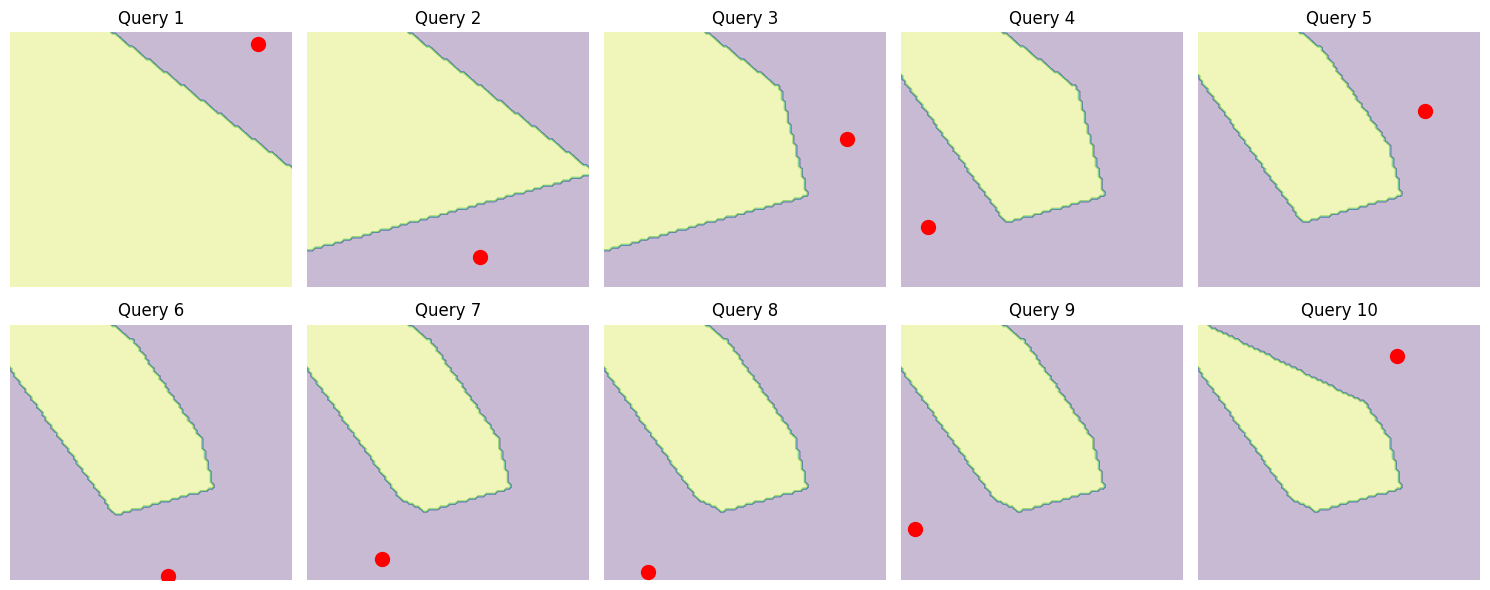

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from modAL.models import ActiveLearner
from sklearn.neighbors import KNeighborsClassifier

# Define a simple synthetic data generator
def generate_synthetic_instance(bounds):
    return np.random.uniform(bounds[:, 0], bounds[:, 1], size=(1, bounds.shape[0]))

# Define the bounds of the feature space
bounds = np.array([[-5, 5], [-5, 5]])

# Define the oracle function (simulating a human annotator)
def oracle(x):
    return int((x[0, 0]**2 + x[0, 1]**2) < 4)

# Initialize a K-Nearest Neighbors classifier with n_neighbors=1
learner = ActiveLearner(
    estimator=KNeighborsClassifier(n_neighbors=1),
    X_training=np.array([[0, 0]]), 
    y_training=np.array([oracle(np.array([[0, 0]]))])
)

# Perform Membership Query Synthesis with subplots
n_queries = 10
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Create a grid of 2 rows and 5 columns
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i in range(n_queries):
    # Generate a synthetic instance
    synthetic_instance = generate_synthetic_instance(bounds)
    
    # Query the oracle for its label
    label = oracle(synthetic_instance)
    
    # Teach the learner with the synthetic instance
    learner.teach(X=synthetic_instance, y=np.array([label]))
    
    # Plot the decision boundary
    x1, x2 = np.meshgrid(np.linspace(bounds[0, 0], bounds[0, 1], 100), 
                         np.linspace(bounds[1, 0], bounds[1, 1], 100))
    grid = np.c_[x1.ravel(), x2.ravel()]
    predictions = learner.predict(grid).reshape(x1.shape)
    axes[i].contourf(x1, x2, predictions, alpha=0.3)
    axes[i].scatter(synthetic_instance[:, 0], synthetic_instance[:, 1], c='red', s=100)
    axes[i].set_title(f'Query {i + 1}')  # Add frame number as the title
    axes[i].set_xlim(bounds[0, 0], bounds[0, 1])  # Set x limits
    axes[i].set_ylim(bounds[1, 0], bounds[1, 1])  # Set y limits
    axes[i].axis('off')  # Turn off axes for a cleaner look

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()


#### MQS in real world problems

**Natural Language Processing (NLP) - Generating Sentences:**
   - **Example**: In NLP, an MQS approach might involve _generating synthetic sentences_ that ***are not*** part of _any existing corpus_ and then _asking a human expert_ to ***label*** them as _grammatically correct or incorrect_. This can help the model learn linguistic structures that it ***might not encounter in a standard corpus***.

**Computer Vision - Generating Images:**
   - **Example**: In computer vision, MQS might be used to generate synthetic images with specific characteristics (e.g., varying shapes, colors, or textures) that the _model hasn't seen before_. An expert could then label these images (e.g., identifying objects in the image), allowing the model to learn from more diverse examples.

**Anomaly Detection - Creating Uncommon Events:**
   - **Example**: In anomaly detection, especially in fields like cybersecurity or finance, MQS can be used to create synthetic transactions or ***events*** that are ***unusual or rare***. These synthetic instances _are labeled as normal or anomalous_ by an expert. This can improve the model's ability to detect real-world anomalies.

**Medical Diagnosis - Simulating Patient Data:**
   - **Example**: In the medical field, MQS could be used to _generate synthetic patient data_ with ***rare or unusual conditions***. _Medical professionals_ can label this data, helping the model to recognize and diagnose rare diseases or conditions that are underrepresented in real patient data.

**Application: Generating Synthetic Text Data for Sentiment Analysis**

Imagine you're developing a _sentiment analysis_ model that classifies ***sentences as positive, neutral, or negative***. Your initial dataset contains typical sentences, but you want your model to handle unusual sentence structures or rare phrases better.

### Mathematical Perspective of MQS

In Membership Query Synthesis (MQS), the algorithm seeks to explore the input space $ \mathcal{X} $ more broadly by generating instances $ \mathbf{x}_\text{new} $ that are selected based on certain criteria, such as maximizing uncertainty, variance, or divergence from existing data points. The new instances $ \mathbf{x}_\text{new} $ are generated by sampling from a distribution or through transformation functions.

Mathematically, the synthesis can be expressed as:
$$ \mathbf{x}_\text{new} = f(\mathbf{x}, \theta) $$
where:
- $ \mathbf{x} $ represents existing data points.
- $ \theta $ are parameters that control the transformation or generation process.
- $ f $ is the function used to generate new instances.

After generating $ \mathbf{x}_\text{new} $, the oracle provides the label:
$$ y_\text{new} = \text{Oracle}(\mathbf{x}_\text{new}) $$

The model is then updated with this new data point $ (\mathbf{x}_\text{new}, y_\text{new}) $, allowing it to learn from these synthetic examples.


### Stream-Based (Sequential) Active Learning


**Stream-Based Active Learning (SBAL)**, also known as **Sequential Active Learning**, is a paradigm where instances are presented to the learning algorithm one at a time or in small batches, and the algorithm must decide whether to query the label for each instance as it arrives. This is particularly useful in scenarios where data arrives in a continuous stream, and it's impractical to store or process all the data at once.

![Stream-Based (Sequential) Active Learning1](../ActiveLearning/ActiveLearningImages/StreamBasedActiveLearning.png)

This approach is highly relevant in real-time applications like 
- online recommendations
- sensor data monitoring
- financial market analysis

where decisions must be made quickly and resources for querying labels are limited.

#### Mathematical Perspective of SBAL

In Stream-Based Active Learning, let $ \mathcal{X} $ be the input space, and $ \mathcal{Y} $ be the output space. The algorithm receives a stream of instances $ \{ \mathbf{x}_t \}_{t=1}^\infty $ where $ t $ represents the time or sequence index.

For each instance $ \mathbf{x}_t $:
1. **Decision Function**: The algorithm uses a decision function $ D(\mathbf{x}_t) $ to decide whether to query the label $ y_t $.
   $$
   \text{Query} = \begin{cases} 
   1 & \text{if } D(\mathbf{x}_t) > \tau, \\
   0 & \text{otherwise},
   \end{cases}
   $$
   where $ \tau $ is a threshold that balances the cost of querying with the expected benefit.

2. **Uncertainty Sampling**: A common approach is to use uncertainty sampling, where $ D(\mathbf{x}_t) $ is based on the model’s uncertainty about $ \mathbf{x}_t $. For example, if the classifier's output probability for the predicted label is close to 0.5 (indicating high uncertainty), the instance is queried.

3. **Model Update**: If the label $ y_t $ is queried, the model is updated using the new labeled instance $ (\mathbf{x}_t, y_t) $.

4. **Objective**: The goal is to maximize the model's performance while minimizing the number of queries. This can be formalized as:
   $$
   \min_{D} \sum_{t=1}^T \left( L(\hat{y}_t, y_t) + \lambda \cdot \text{Query} \right),
   $$
   where $ L(\hat{y}_t, y_t) $ is the loss function, and $ \lambda $ is a regularization parameter balancing the cost of queries.



## Homework: Suitable Real-Time Application with SBAL
- Required text
- Code and discussion of results

### Pool-Based Active Learning

**Pool-Based Active Learning** is the most common form of active learning. It assumes that there is a ***large pool of unlabeled data and a smaller set of labeled data***. The learner iteratively selects the most informative instances from the pool, queries their labels from an oracle (typically a human annotator), and adds them to the labeled set to improve the model.

![PBAL_Fun_1](../ActiveLearning/ActiveLearningImages/PBAL_1_Fun.PNG)

#### Mathematical Framework of PBAL

**Unlabeled Data Pool ($ U $)**: 
   - Let $ U = \{x_1, x_2, \dots, x_n\} $ be the pool of unlabeled data points where $ x_i \in \mathbb{R}^d $ 

**Labeled Dataset ($ L $)**:
   - Let $ L = \{(x_i, y_i) \} $ be the labeled dataset, where $ y_i $ is the label for $ x_i $.
   - Initially, $ |L| \ll |U| $.

**Query Strategy ($ q $)**:
   - A query strategy $ q $ selects a subset $ X_q \subseteq U $ to be labeled by the oracle.
   - The selection is based on a criterion like uncertainty, diversity, or representativeness.

**Model Update**:
   - After querying, the model $ f $ is retrained on the updated labeled dataset $ L' = L \cup X_q $.

### Query-by-Committee (QBC)

**Query-by-Committee (QBC)** is an active learning strategy where multiple models (a "committee") are trained on the same labeled data, and they "**vote**" on the label of _an unlabeled instance_. The idea is to _select instances_ where the _committee members disagree the most_, under the assumption that these instances are the most informative for improving the model.

The committee is typically composed of models that are diverse yet competent. ***Disagreement*** among the committee members ***indicates uncertainty*** about the instance, making it a good candidate for querying the true label.

![QBC_Strategy1](../ActiveLearning/ActiveLearningImages/QBC_1.png)

#### Mathematical Perspective OF QBC

**Committee of Models**:
   - Let $ \mathcal{H} = \{h_1, h_2, \dots, h_C\} $ be a committee of $ C $ models, each trained on the current labeled dataset $ \mathcal{D} = \{(\mathbf{x}_i, y_i)\}_{i=1}^n $.

**Disagreement Measure**:
   - **Vote Entropy**: One way to ***measure disagreement*** is by calculating the entropy of the votes from the committee members. For an unlabeled instance $ \mathbf{x} $, let $ v_j(\mathbf{x}) $ be the number of committee members predicting label $ j $.

$$
H(\mathbf{x}) = -\sum_{j} \frac{v_j(\mathbf{x})}{C} \log \left(\frac{v_j(\mathbf{x})}{C}\right)
$$

     The higher the entropy, the greater the disagreement among the models.

   - **KL Divergence**: Another approach is to measure the Kullback-Leibler divergence between the predictions of different committee members.

**Query Strategy**:
   - The _instance_ with the _highest disagreement_ (highest entropy or KL divergence) is _selected_ for labeling.
   - The committee is then updated by incorporating the newly labeled instance into the training data.

### Expected Model Change

**Expected Model Change (EMC)** is an active learning strategy where the goal is to select instances that, ***if labeled and added to the training set***, are expected to _cause the greatest change to the model_. The idea is that instances causing significant changes are likely to be the most informative, leading to more effective learning.

An example illustrating the EMCM algorithm in linear regression is presented. In this example, red cross marks indicate the training dataset, while blue plus signs represent the unlabeled dataset. The dotted red line depicts the current linear regression model. Upon selecting example A, which causes the most significant change in the model, the algorithm updates the model with the accumulated data, resulting in the solid blue line.

![EMCM_1](../ActiveLearning/ActiveLearningImages/ExpectedModelChange_1.PNG)

### THE FRAMEWORK OF EXPECTED MODEL CHANGE MAXIMIZATION

In this section, we introduce the Expected Model Change Maximization (EMCM) framework and provide a brief interpretation to motivate its use.

#### A. The EMCM Framework

In supervised learning, the goal is to learn a model $ f $ that minimizes the generalization error on unseen data:

$$
\mathcal{L} = \mathbb{E}_{P(x, y)} [L(f(x), y)]
$$

where $ L $ is the loss function, and $ P(x, y) $ is the joint distribution of data $ x $ and label $ y $. As $ P(x, y) $ is often unknown, we instead minimize the empirical error on a training set $ D = \{(x_i, y_i)\}_{i=1}^n $, drawn i.i.d. from $ P(x, y) $:

$$
\hat{\mathcal{L}}_D = \frac{1}{n} \sum_{i=1}^n L(f(x_i), y_i)
$$

For parameter optimization, Stochastic Gradient Descent (SGD) is commonly used:

$$
\theta := \theta - \alpha \frac{\partial \hat{\mathcal{L}}_D}{\partial \theta}
$$

where $ \alpha $ is the learning rate. In active learning, adding a new example $ (x^+, y^+) $ modifies the empirical risk:

$$
\hat{\mathcal{L}}_{D^+} = \frac{1}{n+1} \left(\sum_{i=1}^n L(f(x_i), y_i) + L(f(x^+), y^+) \right)
$$

The change in the model $ C(x^+) $ due to this addition is given by:

$$ C(x^+) = \alpha \frac{\partial L(f(x^+), y^+)}{\partial \theta} $$

The aim is to select $ x^* $ that maximally changes the model:

$$ x^* = \arg\max_{x \in \text{pool}} \|C(x)\| $$

Since the true label $ y^+ $ is unknown, we estimate the expected change:

$$ x^* = \arg\max_{x \in \text{pool}} \sum_{k=1}^K P(y_k | x) \left\| \frac{\partial L(f(x), y_k)}{\partial \theta} \right\| $$

where $ P(y_k | x) $ is the probability of label $ y_k $ given $ x $, estimated by the current model.

#### Interpretation

The effectiveness of the EMCM framework is linked to its impact on generalization error. Specifically, model changes should ideally reduce generalization error. While large changes may not always improve performance due to potential outliers, the iterative nature of active learning ensures that these outliers are less impactful. 

### EMCM FOR ACTIVE LEARNING IN REGRESSION

This section introduces the regression models used and details the active learning algorithms for these models.

**Linear Regression:** The model assumes a linear relationship between features and output:

$$
f(x; \theta) = \theta^T x
$$

where $ \theta $ is the weight vector and $ x $ includes the features and an intercept term.

**Nonlinear Regression:** 

$$
f(x; \theta) = \theta^T \phi (x)
$$

#### Linear Regression Models 

For linear regression, the goal is to minimize the squared-error loss. Given the training set $ D = \{(x_i, y_i)\}_{i=1}^n $, the empirical risk is:

$$
\hat{D} = \frac{1}{2} \sum_{i=1}^n (f(x_i) - y_i)^2
$$

Adding a new example $ (x^+, y^+) $ changes the empirical risk to:

$$
\hat{D}^+ = \frac{1}{2} \sum_{i=1}^n (f(x_i) - y_i)^2 + \frac{1}{2} (f(x^+) - y^+)^2 
$$

The derivative of the squared-error loss with respect to $ \theta $ at $ x^+ $ is:

$$
\frac{\partial \hat{D}^+}{\partial \theta} = (f(x^+) - y^+) x^+
$$

Since the true label $ y^+ $ is unknown, we use bootstrap to estimate the prediction distribution and approximate the model change. The sampling function for linear regression is:

$$
x^* = \arg\max_{x \in \text{pool}} \frac{1}{K} \sum_{k=1}^K \| (f(x) - y_k(x)) x \|
$$

where $ \{f_1, f_2, \ldots, f_K\} $ are bootstrap models and $ y_k(x) $ are the predicted labels. 

Following algorithm provides the pseudo-code for EMCM in linear regression.

### Algorithm : EMCM for Active Learning in Linear Regression

**Input:**  
- Small labeled dataset $ D = \{(x_i, y_i)\}_{i=1}^n $  
- Unlabeled pool set  
- Linear regression model $ f(x; \theta) $ trained with the labeled dataset  

**Steps:**

**Construct Bootstrap Ensemble:**  
   Create an ensemble of $ K $ models using bootstrap sampling:  
   $$ B(K) = \{f_1, f_2, \ldots, f_K\} $$

**For Each Example $ x $ in the Pool Set:**  
   a. **For Each Bootstrap Model $ k $ from 1 to $ K $:**  
      - Predict label $ y_k(x) $ using model $ f_k $:  
        $$ y_k(x) \leftarrow f_k(x) $$  
      - Calculate the derivative of the squared-error loss using:  
        $$ \nabla_{\theta_k}(\theta) \leftarrow (f(x) - y_k(x)) x $$  
   
   b. **Estimate the Expected Model Change:**  
      Compute the expected model change over $ K $ possible labels using:  
      $$ \text{Expected Change}(x) = \frac{1}{K} \sum_{k=1}^K \|\nabla_{\theta_k}(\theta)\| $$

**Select the Example $ x^* $ with the Largest Expected Change:**  
   $$ x^* = \arg\max_{x \in \text{pool}} \text{Expected Change}(x) $$

**Output:**  
- The example $ x^* $ from the pool set that has the largest expected change.

## Homework: write code for EMCM in Linear/non-linear Regression

## Miniprojects: complete another scenarios such as :
        Variance Reduction, Density-Weighted Methods and so on.

### Sampling Strategy in AL

In active learning, several sampling strategies are used to select the most informative instances for labeling. This techniques are used in the aforementioned framework of AL. 

#### Uncertainty Sampling
Uncertainty sampling aims to select instances where the model is least certain about its predictions. This approach focuses on querying the data points where the model has the highest uncertainty, assuming that labeling these instances will provide the most informative feedback to improve the model.

- **Techniques:**
  - **Least Confidence**: Selects instances for which the model has the lowest confidence in its most probable prediction. For a classifier, this is often the instance with the smallest maximum predicted probability.
  - **Margin Sampling**: Chooses instances where the difference between the predicted probabilities of the two most likely classes is smallest. This margin indicates how uncertain the model is about the class assignment.
  - **Entropy Sampling**: Measures the entropy (or uncertainty) of the predicted probability distribution. Instances with the highest entropy are selected because the model's predicted probability distribution is most spread out.

### Least Confidence Sampling

**Objective**: The Least Confidence (LC) sampling strategy selects instances where the model has the least confidence in its most probable prediction. This approach is based on the idea that the instances for which the model is most uncertain about its predictions are the ones that could provide the most valuable information if labeled.

#### Mathematics of Least Confidence Sampling

For a classification problem, consider a model $ f $ that outputs a probability distribution over $ K $ classes. Let $ p_k(x) $ denote the predicted probability of the class $ k $ given the input $ x $. The confidence of the model in its prediction is represented by the probability of the most probable class.

**Probability of Most Likely Class**:
   - For a given instance $ x $, the model predicts probabilities $ \{ p_1(x), p_2(x), \ldots, p_K(x) \} $ for each class.
   - The confidence $ C(x) $ in the model's prediction is given by:
     $$
     C(x) = \max_{k} p_k(x)
     $$
     Here, $ \max_{k} p_k(x) $ is the maximum probability assigned to any class for the instance $ x $.

**Uncertainty Measure**:
   - The Least Confidence strategy aims to select instances where this maximum probability is the smallest. Hence, the uncertainty $ U(x) $ is computed as:
  
$$
  U(x) = 1 - \max_{k} p_k(x)
$$
   - This measure indicates how uncertain the model is about its prediction for instance $ x $. A higher value of $ U(x) $ means the model is less confident about its prediction.

**Selection Criterion**:
   - To perform Least Confidence sampling, select the instance $ x $ from the pool that maximizes the uncertainty:
  
  $$
  x^* = \arg\max_{x \in \text{pool}} \left( 1 - \max_{k} p_k(x) \right)
  $$

   - Here, $ x^* $ is the instance with the highest uncertainty, i.e., the instance where the model is least confident about its most probable prediction.

#### Example

Assume you have a classification model that predicts probabilities for three classes (A, B, C) for an instance $ x $ as follows:

- $ p_A(x) = 0.3 $
- $ p_B(x) = 0.4 $
- $ p_C(x) = 0.3 $

The confidence in the prediction is:

$$
C(x) = \max\{0.3, 0.4, 0.3\} = 0.4
$$

The uncertainty is:

$$
U(x) = 1 - 0.4 = 0.6
$$

If there are other instances in the pool with higher uncertainty values, those instances will be selected for labeling to improve the model's performance.

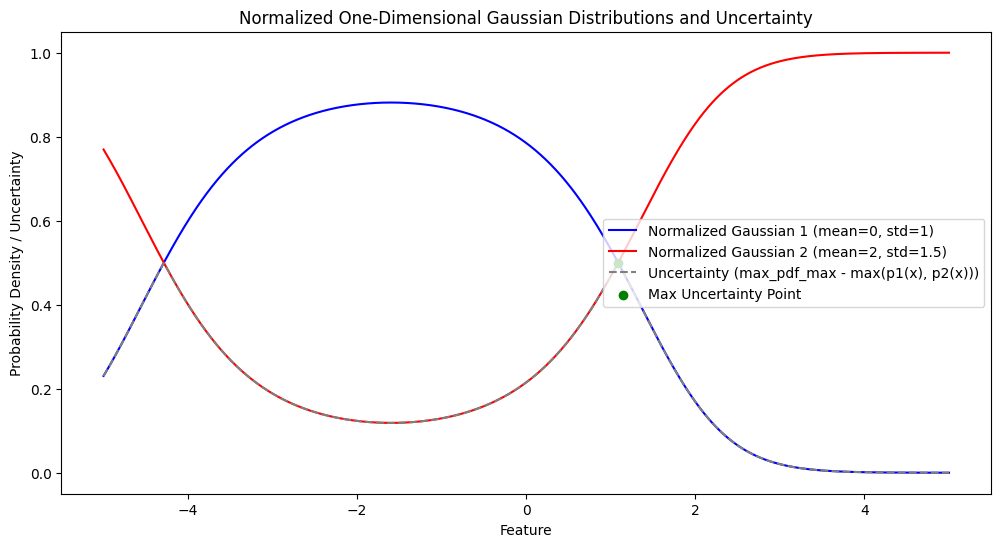

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import simps

# Define two Gaussian distributions
mean1, std_dev1 = 0, 1
mean2, std_dev2 = 2, 1.5

# Create norm distributions
dist1 = norm(loc=mean1, scale=std_dev1)
dist2 = norm(loc=mean2, scale=std_dev2)

# Create a range of values
x = np.linspace(-5, 5, 1000)

# Calculate the probability density functions
pdf1 = dist1.pdf(x)
pdf2 = dist2.pdf(x)
combined_pdf = pdf1 + pdf2
pdf1_normalized=pdf1/ combined_pdf
pdf2_normalized=pdf2/ combined_pdf


# Calculate the maximum of the combined PDFs for each x
max_pdf = np.maximum(pdf1_normalized, pdf2_normalized)

# Find the maximum value of the combined PDFs over the range
max_pdf_max = np.max(max_pdf)

# Calculate uncertainty as max_pdf_max - max_pdf
uncertainty = max_pdf_max - max_pdf

# Find the x-value with the maximum uncertainty
max_uncertainty_index = np.argmax(uncertainty)
x_max_uncertainty = x[max_uncertainty_index]
max_uncertainty = uncertainty[max_uncertainty_index]

# Plot the Gaussian distributions and uncertainty
plt.figure(figsize=(12, 6))

# Plot the first normalized Gaussian distribution
plt.plot(x, pdf1_normalized, label='Normalized Gaussian 1 (mean=0, std=1)', color='blue')

# Plot the second normalized Gaussian distribution
plt.plot(x, pdf2_normalized, label='Normalized Gaussian 2 (mean=2, std=1.5)', color='red')

# Plot the normalized uncertainty
plt.plot(x, uncertainty, label='Uncertainty (max_pdf_max - max(p1(x), p2(x)))', color='gray', linestyle='--')

# Highlight the x-value with the maximum uncertainty
plt.scatter(x_max_uncertainty, max_uncertainty, color='green', zorder=5, label='Max Uncertainty Point')

# Add labels and legend
plt.title('Normalized One-Dimensional Gaussian Distributions and Uncertainty')
plt.xlabel('Feature')
plt.ylabel('Probability Density / Uncertainty')
plt.legend()

plt.show()


C:\Users\Dr\AppData\Local\Temp\ipykernel_10456\3691839792.py:35: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_unlabeled[:, 0], X_unlabeled[:, 1], c='lightgray', marker='x', edgecolor='k', label='Unlabeled Data')
C:\Users\Dr\AppData\Local\Temp\ipykernel_10456\3691839792.py:38: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(top_uncertainty_samples[:, 0], top_uncertainty_samples[:, 1], c='red', edgecolor='k', marker='x', s=100, label='High Uncertainty')


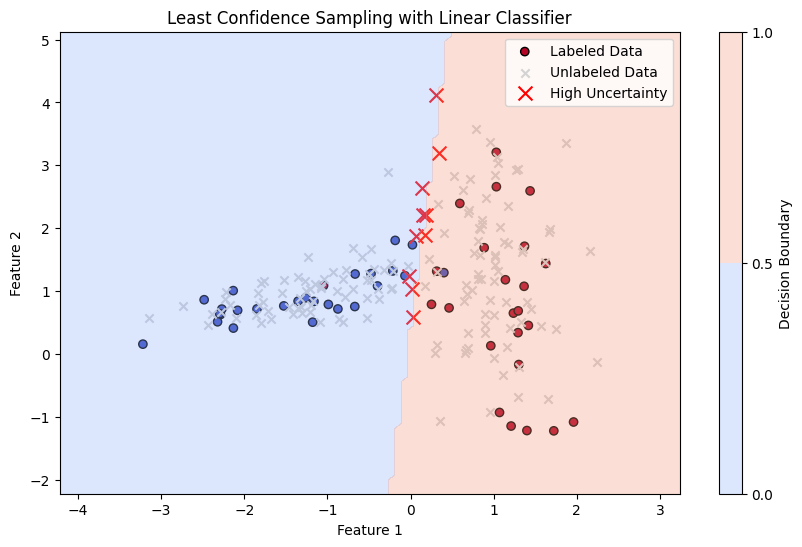

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# 1. Generate Synthetic Data
np.random.seed(0)
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_clusters_per_class=1, n_redundant=0)
X_labeled = X[:50]  # First 50 samples are labeled
y_labeled = y[:50]
X_unlabeled = X[50:]  # Remaining samples are unlabeled

# 2. Fit a Linear Classifier
model = LogisticRegression()
model.fit(X_labeled, y_labeled)

# 3. Calculate Uncertainty
probabilities = model.predict_proba(X_unlabeled)
max_prob = np.max(probabilities, axis=1)  # Maximum probability for each sample
uncertainty = 1 - max_prob  # Uncertainty as 1 - max probability

# Find instances with the highest uncertainty
top_uncertainty_indices = np.argsort(uncertainty)[-10:]  # Select top 10 most uncertain samples
top_uncertainty_samples = X_unlabeled[top_uncertainty_indices]
top_uncertainty_values = uncertainty[top_uncertainty_indices]

# 4. Plot Results
plt.figure(figsize=(10, 6))

# Plot labeled samples
plt.scatter(X_labeled[:, 0], X_labeled[:, 1], c=y_labeled, marker='o', edgecolor='k', cmap='coolwarm', label='Labeled Data')

# Plot unlabeled samples
plt.scatter(X_unlabeled[:, 0], X_unlabeled[:, 1], c='lightgray', marker='x', edgecolor='k', label='Unlabeled Data')

# Highlight most uncertain samples
plt.scatter(top_uncertainty_samples[:, 0], top_uncertainty_samples[:, 1], c='red', edgecolor='k', marker='x', s=100, label='High Uncertainty')

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100), np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm', levels=np.linspace(0, 1, 3))

plt.title('Least Confidence Sampling with Linear Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.colorbar(label='Decision Boundary')
plt.show()


### Margin Sampling

**Margin Sampling** is a specific type of uncertainty sampling used in active learning. The idea is to select instances where the model is most uncertain, but instead of looking at the highest uncertainty directly, it looks at the smallest difference between the top two predicted probabilities (the margin). 

**Margin Sampling** and **Least Confidence Sampling** are both uncertainty-based strategies in active learning, but they differ in how they measure uncertainty for selecting which instances to label next.

- **Mathematics**: For a given instance $ x $, with predicted class probabilities $ p_1(x), p_2(x), \ldots, p_K(x) $, sorted such that $ p_{(1)}(x) \geq p_{(2)}(x) \geq \ldots \geq p_{(K)}(x) $, the margin is calculated as:

$$
m(x) =\text{Margin}(x) = p_{(1)}(x) - p_{(2)}(x)
$$

The uncertainty is inversely proportional to this margin. The sample with the smallest margin is selected for labeling.

In Margin Sampling, the instance $x^*$ selected for labeling is:

$$
x^* = \arg \min_{x \in \text{pool}} m(x)
$$

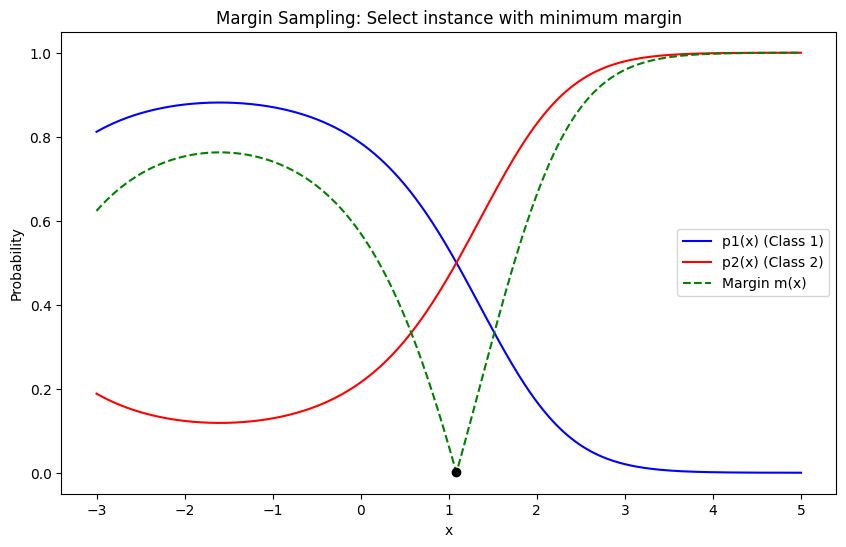

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define two Gaussian distributions
mean1, std_dev1 = 0, 1
mean2, std_dev2 = 2, 1.5

# Create norm distributions
dist1 = norm(loc=mean1, scale=std_dev1)
dist2 = norm(loc=mean2, scale=std_dev2)

# Create a range of values
x = np.linspace(-3, 5, 1000)

# Calculate PDFs
pdf1 = dist1.pdf(x)
pdf2 = dist2.pdf(x)

# Normalize so the sum is 1 for each x
total_pdf = pdf1 + pdf2
pdf1_normalized = pdf1 / total_pdf
pdf2_normalized = pdf2 / total_pdf

# Calculate margins
margins = np.abs(pdf1_normalized - pdf2_normalized)

# Find the index of the minimum margin
min_margin_index = np.argmin(margins)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, pdf1_normalized, label='p1(x) (Class 1)', color='blue')
plt.plot(x, pdf2_normalized, label='p2(x) (Class 2)', color='red')
plt.plot(x, margins, label='Margin m(x)', color='green', linestyle='--')
plt.scatter(x[min_margin_index], margins[min_margin_index], color='black', zorder=5)
plt.title('Margin Sampling: Select instance with minimum margin')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.show()


C:\Users\Dr\AppData\Local\Temp\ipykernel_10456\3195940474.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_unlabeled[:, 0], X_unlabeled[:, 1], c='lightgray', marker='x', edgecolor='k', label='Unlabeled Data')
C:\Users\Dr\AppData\Local\Temp\ipykernel_10456\3195940474.py:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(top_margin_samples[:, 0], top_margin_samples[:, 1], c='red', edgecolor='k', marker='x', s=100, label='Smallest Margin')


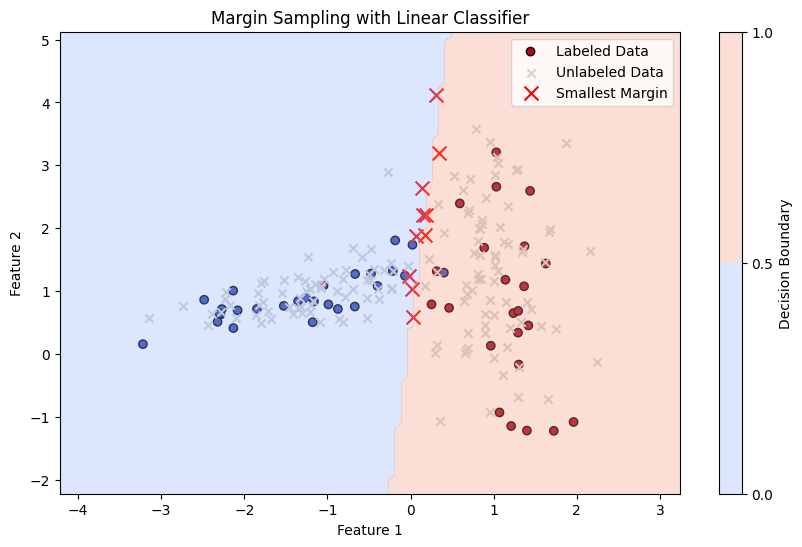

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 1. Generate Synthetic Data
np.random.seed(0)
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_clusters_per_class=1, n_redundant=0)
X_labeled = X[:50]  # First 50 samples are labeled
y_labeled = y[:50]
X_unlabeled = X[50:]  # Remaining samples are unlabeled

# 2. Fit a Linear Classifier
model = LogisticRegression()
model.fit(X_labeled, y_labeled)

# 3. Calculate Margin
probabilities = model.predict_proba(X_unlabeled)
sorted_probabilities = np.sort(probabilities, axis=1)
margins = sorted_probabilities[:, -1] - sorted_probabilities[:, -2]  # Margin as the difference between top two probabilities

# Find instances with the smallest margin (highest uncertainty)
top_margin_indices = np.argsort(margins)[:10]  # Select top 10 most uncertain samples (smallest margin)
top_margin_samples = X_unlabeled[top_margin_indices]
top_margin_values = margins[top_margin_indices]

# 4. Plot Results
plt.figure(figsize=(10, 6))

# Plot labeled samples
plt.scatter(X_labeled[:, 0], X_labeled[:, 1], c=y_labeled, marker='o', edgecolor='k', cmap='coolwarm', label='Labeled Data')

# Plot unlabeled samples
plt.scatter(X_unlabeled[:, 0], X_unlabeled[:, 1], c='lightgray', marker='x', edgecolor='k', label='Unlabeled Data')

# Highlight most uncertain samples (smallest margin)
plt.scatter(top_margin_samples[:, 0], top_margin_samples[:, 1], c='red', edgecolor='k', marker='x', s=100, label='Smallest Margin')

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100), np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm', levels=np.linspace(0, 1, 3))

plt.title('Margin Sampling with Linear Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.colorbar(label='Decision Boundary')
plt.show()


### Entropy Sampling

- **Definition**: Entropy Sampling selects instances for labeling where the model’s prediction distribution is the most uncertain, which is quantified using entropy. Entropy is a measure of uncertainty or disorder in a probability distribution. In the context of active learning, it is used to capture how evenly distributed the predicted probabilities are across all possible classes.

- **Mathematics**: For a given instance $ x $, the model predicts class probabilities $ p_1(x), p_2(x), \ldots, p_K(x) $ for $ K $ classes. The entropy of the prediction is calculated as:

$$
H(x) = -\sum_{k=1}^{K} p_k(x) \log p_k(x)
$$

  Here, $ H(x) $ measures the uncertainty in the model's prediction. The higher the entropy, the more uncertain the model is about the prediction. In Entropy Sampling, the instances with the highest entropy are selected for labeling.

$$
  x^* = \arg \max_{x \in \text{pool}} \left( -\sum_{k} p_k(x) \log p_k(x) \right)
$$

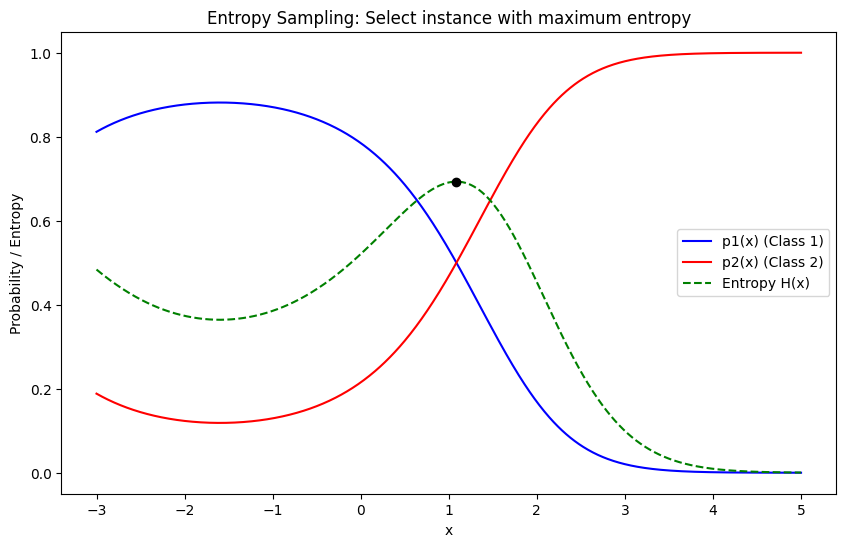

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define two Gaussian distributions
mean1, std_dev1 = 0, 1
mean2, std_dev2 = 2, 1.5

# Create norm distributions
dist1 = norm(loc=mean1, scale=std_dev1)
dist2 = norm(loc=mean2, scale=std_dev2)

# Create a range of values
x = np.linspace(-3, 5, 1000)

# Calculate PDFs
pdf1 = dist1.pdf(x)
pdf2 = dist2.pdf(x)

# Normalize so the sum is 1 for each x
total_pdf = pdf1 + pdf2
pdf1_normalized = pdf1 / total_pdf
pdf2_normalized = pdf2 / total_pdf

# Calculate entropy
entropy = - (pdf1_normalized * np.log(pdf1_normalized + 1e-9) + 
             pdf2_normalized * np.log(pdf2_normalized + 1e-9))

# Find the index of the maximum entropy
max_entropy_index = np.argmax(entropy)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, pdf1_normalized, label='p1(x) (Class 1)', color='blue')
plt.plot(x, pdf2_normalized, label='p2(x) (Class 2)', color='red')
plt.plot(x, entropy, label='Entropy H(x)', color='green', linestyle='--')
plt.scatter(x[max_entropy_index], entropy[max_entropy_index], color='black', zorder=5)
plt.title('Entropy Sampling: Select instance with maximum entropy')
plt.xlabel('x')
plt.ylabel('Probability / Entropy')
plt.legend()
plt.show()


C:\Users\Dr\AppData\Local\Temp\ipykernel_10456\1936272304.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_unlabeled[:, 0], X_unlabeled[:, 1], c='lightgray', marker='x', edgecolor='k', label='Unlabeled Data')
C:\Users\Dr\AppData\Local\Temp\ipykernel_10456\1936272304.py:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(top_entropy_samples[:, 0], top_entropy_samples[:, 1], c='red', edgecolor='k', marker='x', s=100, label='High Entropy')


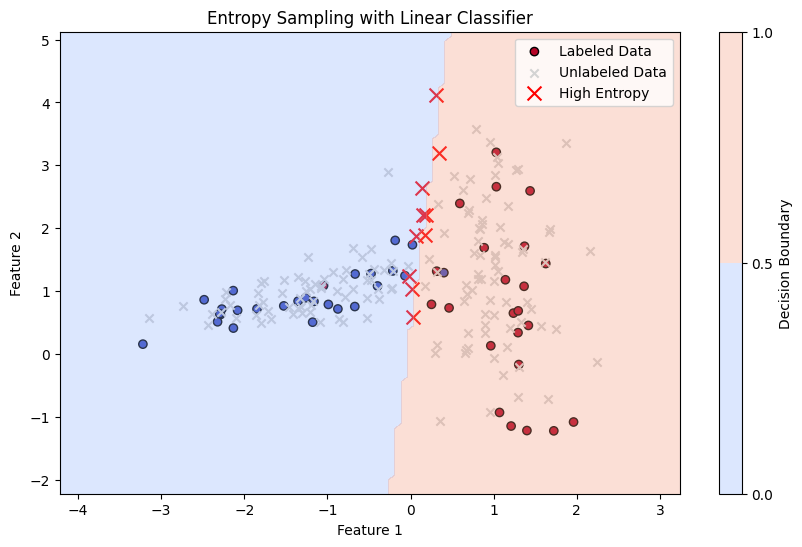

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# 1. Generate Synthetic Data
np.random.seed(0)
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_clusters_per_class=1, n_redundant=0)
X_labeled = X[:50]  # First 50 samples are labeled
y_labeled = y[:50]
X_unlabeled = X[50:]  # Remaining samples are unlabeled

# 2. Fit a Linear Classifier
model = LogisticRegression()
model.fit(X_labeled, y_labeled)

# 3. Calculate Entropy
probabilities = model.predict_proba(X_unlabeled)
entropy = -np.sum(probabilities * np.log(probabilities + 1e-9), axis=1)  # Calculate entropy for each sample

# Find instances with the highest entropy
top_entropy_indices = np.argsort(entropy)[-10:]  # Select top 10 most uncertain samples
top_entropy_samples = X_unlabeled[top_entropy_indices]
top_entropy_values = entropy[top_entropy_indices]

# 4. Plot Results
plt.figure(figsize=(10, 6))

# Plot labeled samples
plt.scatter(X_labeled[:, 0], X_labeled[:, 1], c=y_labeled, marker='o', edgecolor='k', cmap='coolwarm', label='Labeled Data')

# Plot unlabeled samples
plt.scatter(X_unlabeled[:, 0], X_unlabeled[:, 1], c='lightgray', marker='x', edgecolor='k', label='Unlabeled Data')

# Highlight samples with the highest entropy
plt.scatter(top_entropy_samples[:, 0], top_entropy_samples[:, 1], c='red', edgecolor='k', marker='x', s=100, label='High Entropy')

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100), np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm', levels=np.linspace(0, 1, 3))

plt.title('Entropy Sampling with Linear Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.colorbar(label='Decision Boundary')
plt.show()


## Miniprojects: Another sampling methods such as Diversity Sampling, and so on. 

## Miniprojects : Working with modAL
[modAL](https://modal-python.readthedocs.io/en/latest/)
also 
[modAl_github](https://github.com/modAL-python/modAL/tree/dev)
some example of keras 
[keras_AL](https://keras.io/examples/nlp/active_learning_review_classification/)
